## Analysis of data F1

- https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020

*(This dataset does not have complete information and is missing data, it is used as a practice)* 

Process will be applied CRISP-DM

## Business Understanding:
- The following csv files have information related to each lap of each F1 driver from 1950 to 2021. 

## Elements of CSV:
- name_gp: string. Discrete qualitative variable. Grand prix name.
- date: string. Quantitative variable. Grand prix date.
- driver: string. Qualitative variable. Driver name.
- lap: int. Qualitative variable. Lap number.
- position: int. Qualitative variable. Position number.
- time: string. Continuous quantitative variable. Time lap.
- time_miliseconds: int. Quantitative variable. Time lap in miliseconds.
- nationality: string. Qualitative variable. Nationality driver.

Importing libraries

In [3]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Creating csv file from the union of lap_times.csv - races.csv and drivers.csv

In [ ]:
#Create file writer
with open('lap_drivers.csv', 'w', newline='') as csvfile2:  
    writer = csv.writer(csvfile2, delimiter=',')

    #Read file with times laps
    with open('lap_times.csv', newline='', encoding='utf-8') as csvfile: 
        times_laps = csv.reader(csvfile, delimiter=',', quotechar='"')
        next(times_laps)
        count = 0
        writer.writerow([
          'name_gp', 
          'date', 
          'driver', 
          'lap_number', 
          'position', 
          'time', 
          'time_miliseconds', 
          'nationality'
        ])

        for line_split in times_laps:
            count += 1
            
            #Read file with drivers information
            with open('drivers.csv', newline='', encoding='utf-8') as csvfiled: 
                drivers = csv.reader(csvfiled, delimiter=',', quotechar='"')
                next(drivers)

                #Read file with races information
                with open('races.csv', newline='', encoding='utf-8') as csvfiler: 
                    races = csv.reader(csvfiler, delimiter=',', quotechar='"')
                    next(races)
                    race_id = line_split[0]
                    driver_id = line_split[1]
                    lap = line_split[2]
                    position = line_split[3] 
                    time = line_split[4]
                    milliseconds = line_split[5]
                    nationality = ''
                    date = ''

                    for line_driver in drivers:
                        if (line_driver[0] == driver_id):
                            driver_id = line_driver[4]+' '+line_driver[5]
                            nationality = line_driver[7]

                    for line_races in races:
                        if (line_races[0] == race_id):
                            race_id = line_races[4]
                            date = line_races[5]

                    out = [
                      race_id, 
                      date, 
                      driver_id, 
                      lap, 
                      position, 
                      time, 
                      milliseconds, 
                      nationality
                    ]
                    
            writer.writerow(out)

## Objectives

- View and compare the top 5 drivers with the most laps in first place.
- Number of laps in first place between Vettel and Hamilton 
- Fastest lap at each grand prix 

# Data exploration - EDA


In [4]:
laps = pd.read_csv("lap_drivers.csv", encoding='latin-1')
laps

,nombre_gp,fecha,conductor,vuelta,posicion,tiempo,milisegundos,nacionalidad
0,Australian Grand Prix,27/03/11,Sebastian Vettel,1,1,1:38.109,98109,German
1,Australian Grand Prix,27/03/11,Sebastian Vettel,2,1,1:33.006,93006,German
2,Australian Grand Prix,27/03/11,Sebastian Vettel,3,1,1:32.713,92713,German
3,Australian Grand Prix,27/03/11,Sebastian Vettel,4,1,1:32.803,92803,German
4,Australian Grand Prix,27/03/11,Sebastian Vettel,5,1,1:32.342,92342,German
...,...,...,...,...,...,...,...,...
517568,Australian Grand Prix,10/04/22,Alexander Albon,54,7,1:22.589,82589,Thai
517569,Australian Grand Prix,10/04/22,Alexander Albon,55,7,1:22.758,82758,Thai
517570,Australian Grand Prix,10/04/22,Alexander Albon,56,7,1:22.658,82658,Thai
517571,Australian Grand Prix,10/04/22,Alexander Albon,57,9,1:38.438,98438,Thai


In [5]:
laps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517573 entries, 0 to 517572
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   nombre_gp     517573 non-null  object
 1   fecha         517573 non-null  object
 2   conductor     517573 non-null  object
 3   vuelta        517573 non-null  int64 
 4   posicion      517573 non-null  int64 
 5   tiempo        517573 non-null  object
 6   milisegundos  517573 non-null  int64 
 7   nacionalidad  517573 non-null  object
dtypes: int64(3), object(5)
memory usage: 31.6+ MB


In [6]:
laps.columns

Index(['nombre_gp', 'fecha', 'conductor', 'vuelta', 'posicion', 'tiempo',
       'milisegundos', 'nacionalidad'],
      dtype='object')

## **Objectives**



Top 5 drivers with the most laps in first place

In [62]:
laps_total = laps.groupby(by=["posicion","conductor"], dropna=False).size().reset_index(name = 'num_laps').sort_values(by=['num_laps'], ascending=False)
laps_leaders = laps_total[(laps_total["posicion"] == 1)]
laps_leaders.head(5)

,posicion,conductor,num_laps
29,1,Lewis Hamilton,5397
33,1,Michael Schumacher,3937
48,1,Sebastian Vettel,3499
14,1,Fernando Alonso,1769
39,1,Nico Rosberg,1533


Laps leader Hamilton

In [8]:
hamilton = laps_leaders[(laps_leaders['conductor'] == 'Lewis Hamilton')]
hamilton['num_laps'].iloc[0]

5397

Laps leader Vettel

In [9]:
#Another way of consult
vettel = laps_total[(laps_total['conductor'] == 'Sebastian Vettel') & (laps_total['posicion'] == 1)]
vettel.num_laps.iloc[0]

3499

In [10]:
gps = laps.groupby("nombre_gp")["milisegundos"].agg(tiempo_rapido="min", tiempo_lento="max")
gps

,tiempo_rapido,tiempo_lento
nombre_gp,,
70th Anniversary Grand Prix,88451,119345
Abu Dhabi Grand Prix,86103,181543
Argentine Grand Prix,87981,941618
Australian Grand Prix,80260,1243269
Austrian Grand Prix,66200,564047
Azerbaijan Grand Prix,103009,2210714
Bahrain Grand Prix,90252,1354973
Belgian Grand Prix,105108,1160189
Brazilian Grand Prix,70540,2126744


In [76]:
idxs = laps.groupby(["nombre_gp"])["milisegundos"].agg(["idxmin"])
faster = laps.loc[idxs["idxmin"]]
faster

,nombre_gp,fecha,conductor,vuelta,posicion,tiempo,milisegundos,nacionalidad
477186,70th Anniversary Grand Prix,09/08/20,Lewis Hamilton,43,4,1:28.451,88451,British
513690,Abu Dhabi Grand Prix,12/12/21,Max Verstappen,39,2,1:26.103,86103,Dutch
130730,Argentine Grand Prix,13/04/97,Gerhard Berger,63,6,1:27.981,87981,Austrian
516588,Australian Grand Prix,10/04/22,Charles Leclerc,58,1,1:20.260,80260,Monegasque
500311,Austrian Grand Prix,04/07/21,Max Verstappen,62,1,1:06.200,66200,Dutch
452514,Azerbaijan Grand Prix,28/04/19,Charles Leclerc,50,5,1:43.009,103009,Monegasque
248125,Bahrain Grand Prix,04/04/04,Michael Schumacher,7,1,1:30.252,90252,German
260255,Belgian Grand Prix,29/08/04,Kimi RÃ¤ikkÃ¶nen,42,1,1:45.108,105108,Finnish
446758,Brazilian Grand Prix,11/11/18,Valtteri Bottas,65,5,1:10.540,70540,Finnish
256556,British Grand Prix,11/07/04,Michael Schumacher,14,1,1:18.739,78739,German


## Graphics 

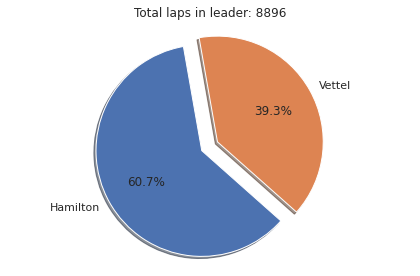

In [12]:
drivers = [hamilton.num_laps.iloc[0] ,vettel.num_laps.iloc[0]]

plt.pie(
    drivers, 
    labels=['Hamilton','Vettel'], 
    autopct="%1.1f%%",
    shadow = True,
    explode = (0.07 , 0.1),
    startangle = 100
  )
plt.axis('equal')
plt.title(f'Total laps in leader: {(hamilton.num_laps.iloc[0]+vettel.num_laps.iloc[0])}')
plt.tight_layout()
plt.show()

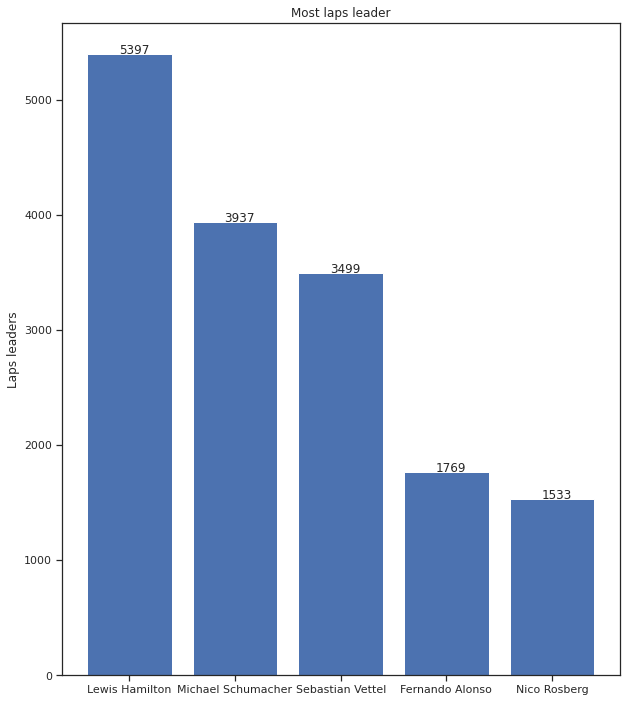

In [61]:
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i-1.1,y_list[i-1],y_list[i-1])

fig, ax = plt.subplots()
plt.title(f'Most laps leader')
ax.bar(laps_leaders.head(5).conductor,laps_leaders.head(5).num_laps)
add_value_label(laps_leaders.head(5).conductor.to_numpy().tolist(),laps_leaders.head(5).num_laps.to_numpy().tolist())
plt.rcParams["figure.figsize"] = (10, 12)
ax.set_ylabel("Laps leaders") 
plt.show()